In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
from scipy.spatial import ConvexHull
%load_ext autoreload
%matplotlib inline

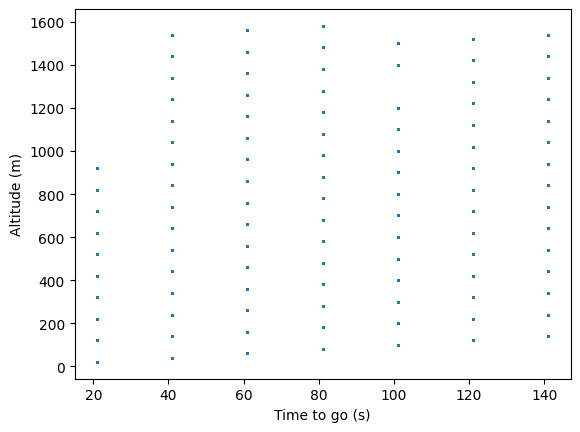

In [2]:
data = np.load("../out/controllable_set/20231108-144422/data.npy")
data = data[(data[:, 3] >= 0)]  # Remove negative time to go
data = data[(data[:, 6] <= 1905.0)]  # Remove over-sized initial mass

fig, ax = plt.subplots()
ax.scatter(data[:, 7], data[:, 2], s=1, alpha=0.5)
ax.set_ylabel('Altitude (m)')
ax.set_xlabel('Time to go (s)')
plt.show()

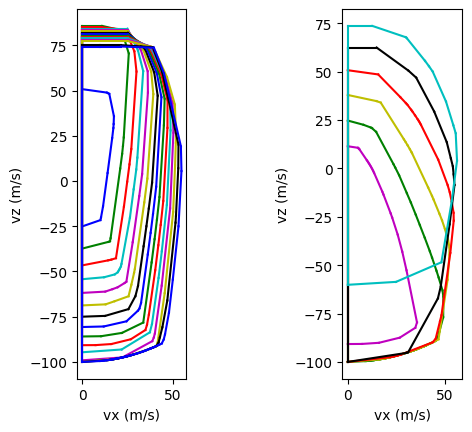

In [3]:
fig, axs = plt.subplots(1, 2)

x_idx = 3  # vx
y_idx = 5  # vz
colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k']

# group by algitude
group_idx = 2
group_ranges = np.arange(0, np.max(data[:, group_idx]), 100)

for i in range(len(group_ranges)-1):
        group = data[(data[:, group_idx] >= group_ranges[i]) & (data[:, group_idx] < group_ranges[i+1])]
        #axs[0].scatter(group[:, x_idx], group[:, y_idx], s=1, alpha=0.5, color=colors[i % len(colors)])
        # Calculate convex hull for each group
        if len(group) >= 3:  # ConvexHull requires at least 3 points in 2D
            hull = ConvexHull(group[:, [x_idx, y_idx]])
            for s in hull.simplices:
                axs[0].plot(group[s, x_idx], group[s, y_idx], color=colors[i % len(colors)])

# group by time to go
group_idx = 7
group_ranges = np.arange(0, np.max(data[:, group_idx]), 5)

for i in range(len(group_ranges)-1):
        group = data[(data[:, group_idx] >= group_ranges[i]) & (data[:, group_idx] < group_ranges[i+1])]
        # Calculate convex hull for each group
        if len(group) >= 3:  # ConvexHull requires at least 3 points in 2D
            hull = ConvexHull(group[:, [x_idx, y_idx]])
            for s in hull.simplices:
                axs[1].plot(group[s, x_idx], group[s, y_idx], color=colors[i % len(colors)])

for ax in axs:
    ax.set_xlabel('vx (m/s)')
    ax.set_ylabel('vz (m/s)')
    # aspect ratio
    ax.set_aspect('equal', 'box')
plt.show()


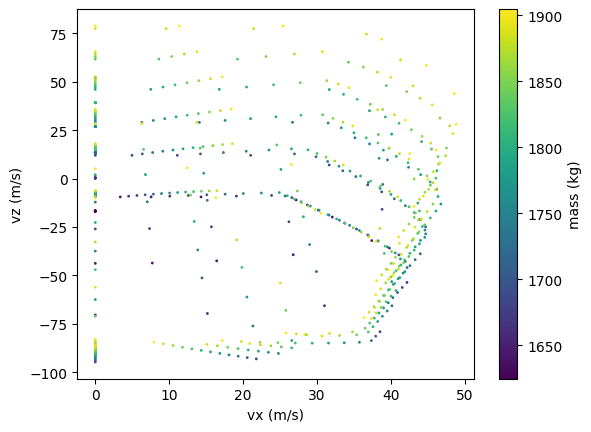

In [4]:
# group by altitude
groupby_idx = 2
group_ranges = np.arange(0, np.max(data[:, groupby_idx]), 100)
group_idx = 10
group = data[(data[:, groupby_idx] >= group_ranges[group_idx]) & (data[:, groupby_idx] < group_ranges[group_idx+1])]

fig, ax = plt.subplots()
scatter = ax.scatter(group[:, 3], group[:, 5], s=1, c=group[:, 6])
ax.set_xlabel('vx (m/s)')
ax.set_ylabel('vz (m/s)')

cb = fig.colorbar(scatter)
cb.set_label('mass (kg)')

plt.show()

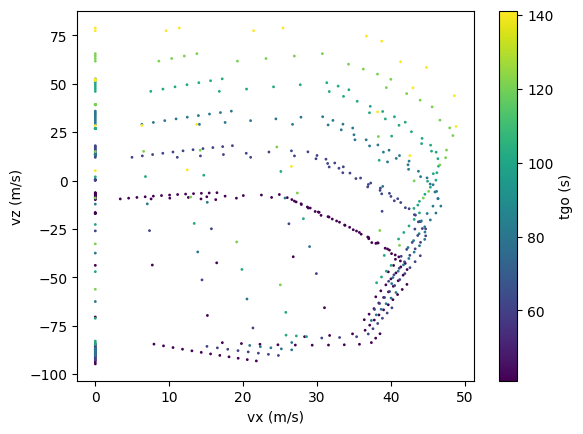

In [5]:
# group by altitude
groupby_idx = 2
group_ranges = np.arange(0, np.max(data[:, groupby_idx]), 100)
group_idx = 10
group = data[(data[:, groupby_idx] >= group_ranges[group_idx]) & (data[:, groupby_idx] < group_ranges[group_idx+1])]

fig, ax = plt.subplots()
scatter = ax.scatter(group[:, 3], group[:, 5], s=1, c=group[:, 7])
ax.set_xlabel('vx (m/s)')
ax.set_ylabel('vz (m/s)')

cb = fig.colorbar(scatter)
cb.set_label('tgo (s)')

plt.show()

In [6]:
data.shape

(10459, 9)

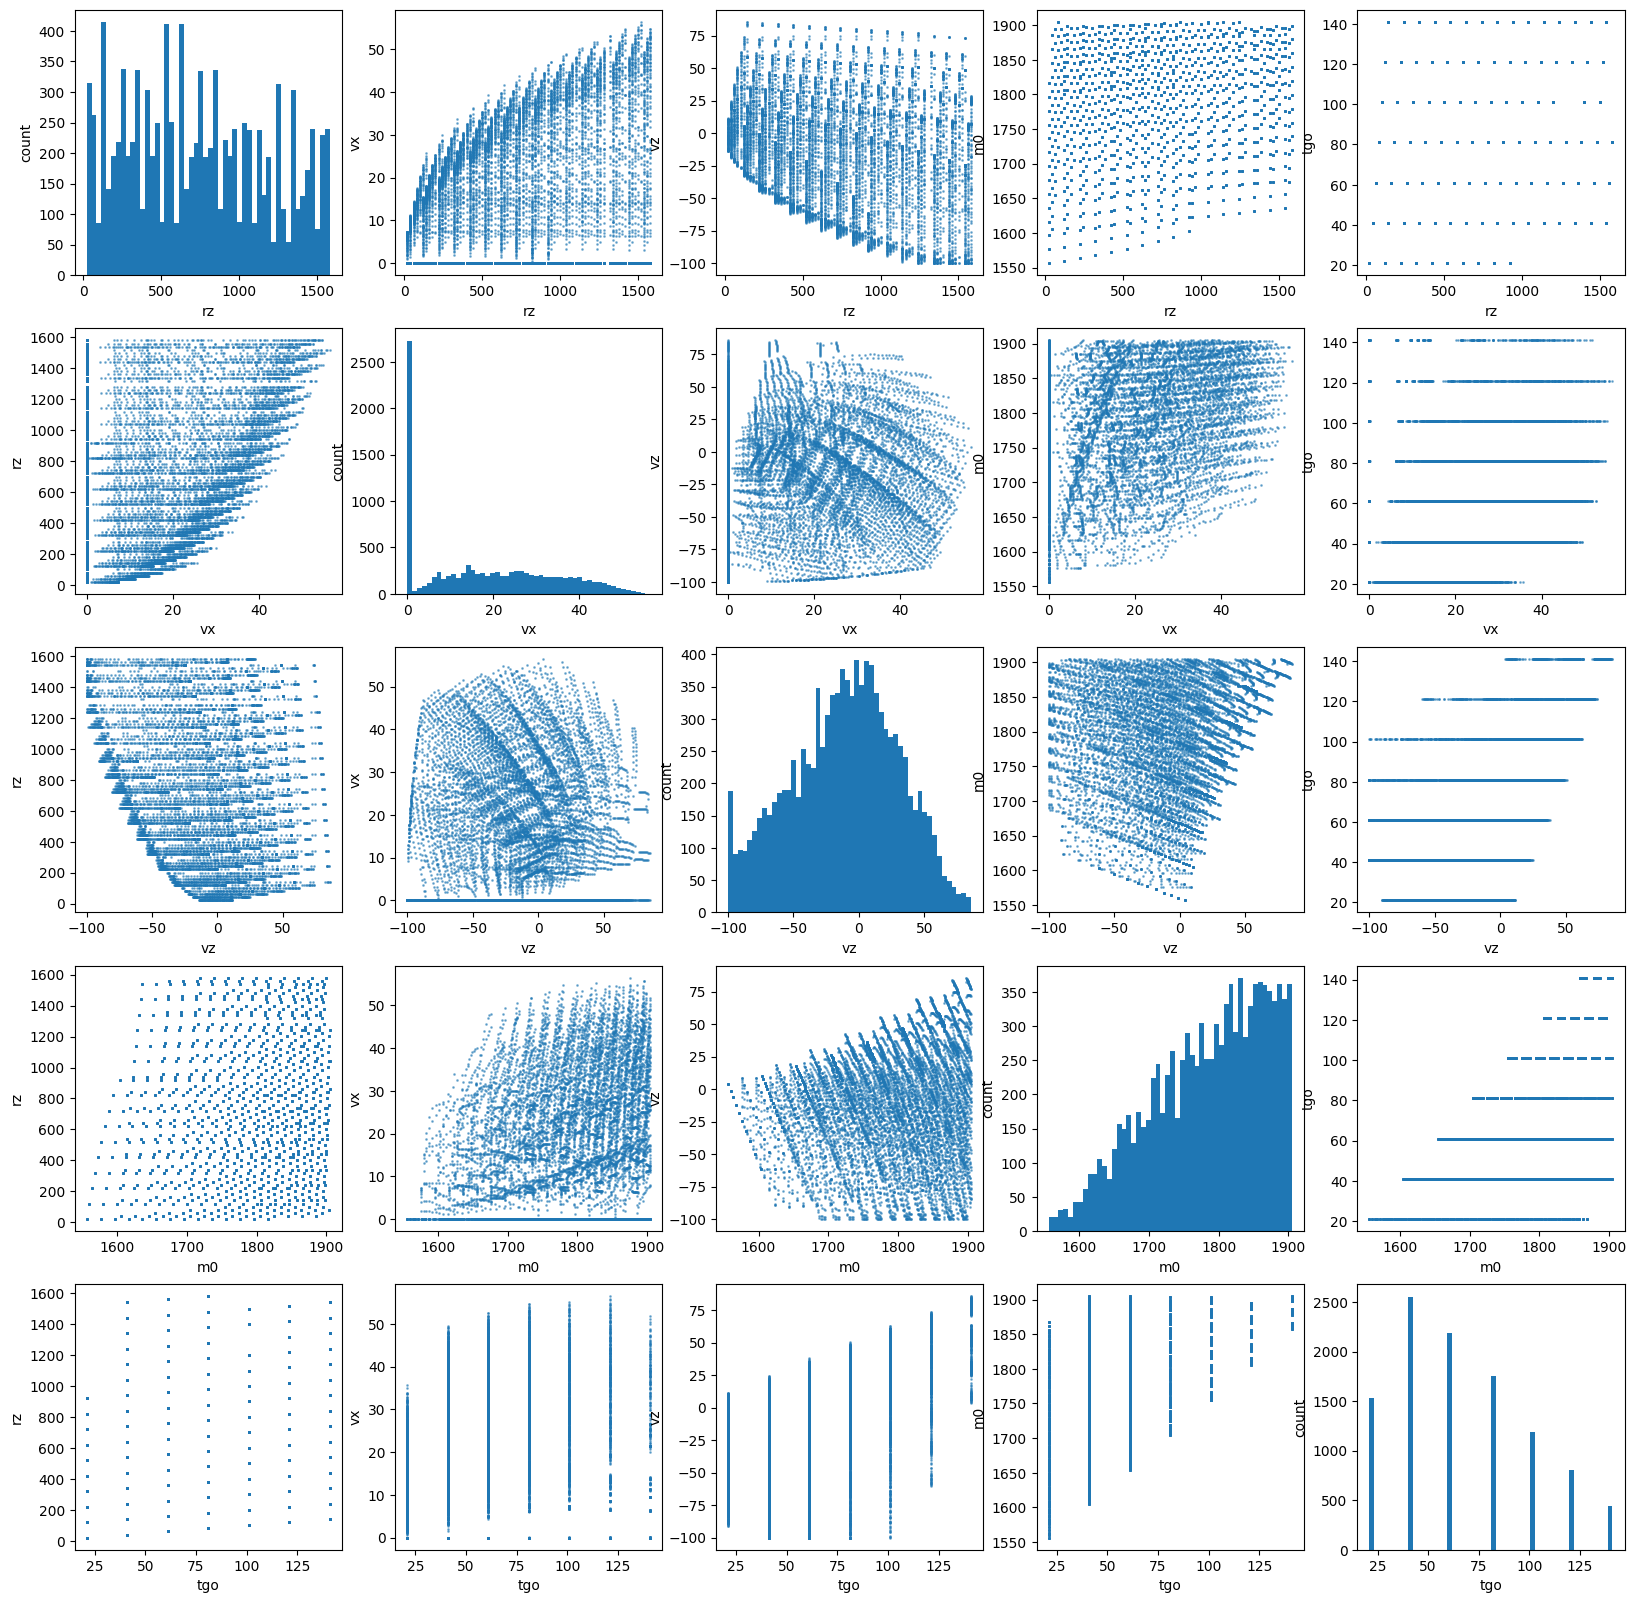

In [7]:
fig, axs = plt.subplots(5, 5, figsize=(20, 20))
names = ['rx', 'ry', 'rz', 'vx', 'vy', 'vz', 'm0', 'tgo', 'mf']
indices = [2, 3, 5, 6, 7]
for i, x_idx in enumerate(indices):
    for j, y_idx in enumerate(indices):
        if j==i: 
            axs[i, j].hist(data[:, x_idx], bins=50)
            axs[i, j].set_xlabel(f'{names[x_idx]}')
            axs[i, j].set_ylabel('count')
        else:
            axs[i, j].scatter(data[:, x_idx], data[:, y_idx], s=1, alpha=0.5)
            axs[i, j].set_xlabel(f'{names[x_idx]}')
            axs[i, j].set_ylabel(f'{names[y_idx]}')

plt.show()

In [8]:
m0_ranges = np.arange(np.min(data[:, 6]), np.max(data[:, 6]), 100)
alt_ranges = np.arange(np.min(data[:, 2]), np.max(data[:, 2]), 200)
tgo_ranges = np.arange(np.min(data[:, 7]), np.max(data[:, 7]), 20)

n_m0 = len(m0_ranges) - 1
n_alt = len(alt_ranges) - 1
n_tgo = len(tgo_ranges) - 1
print(n_m0, n_alt, n_tgo)

3 7 5


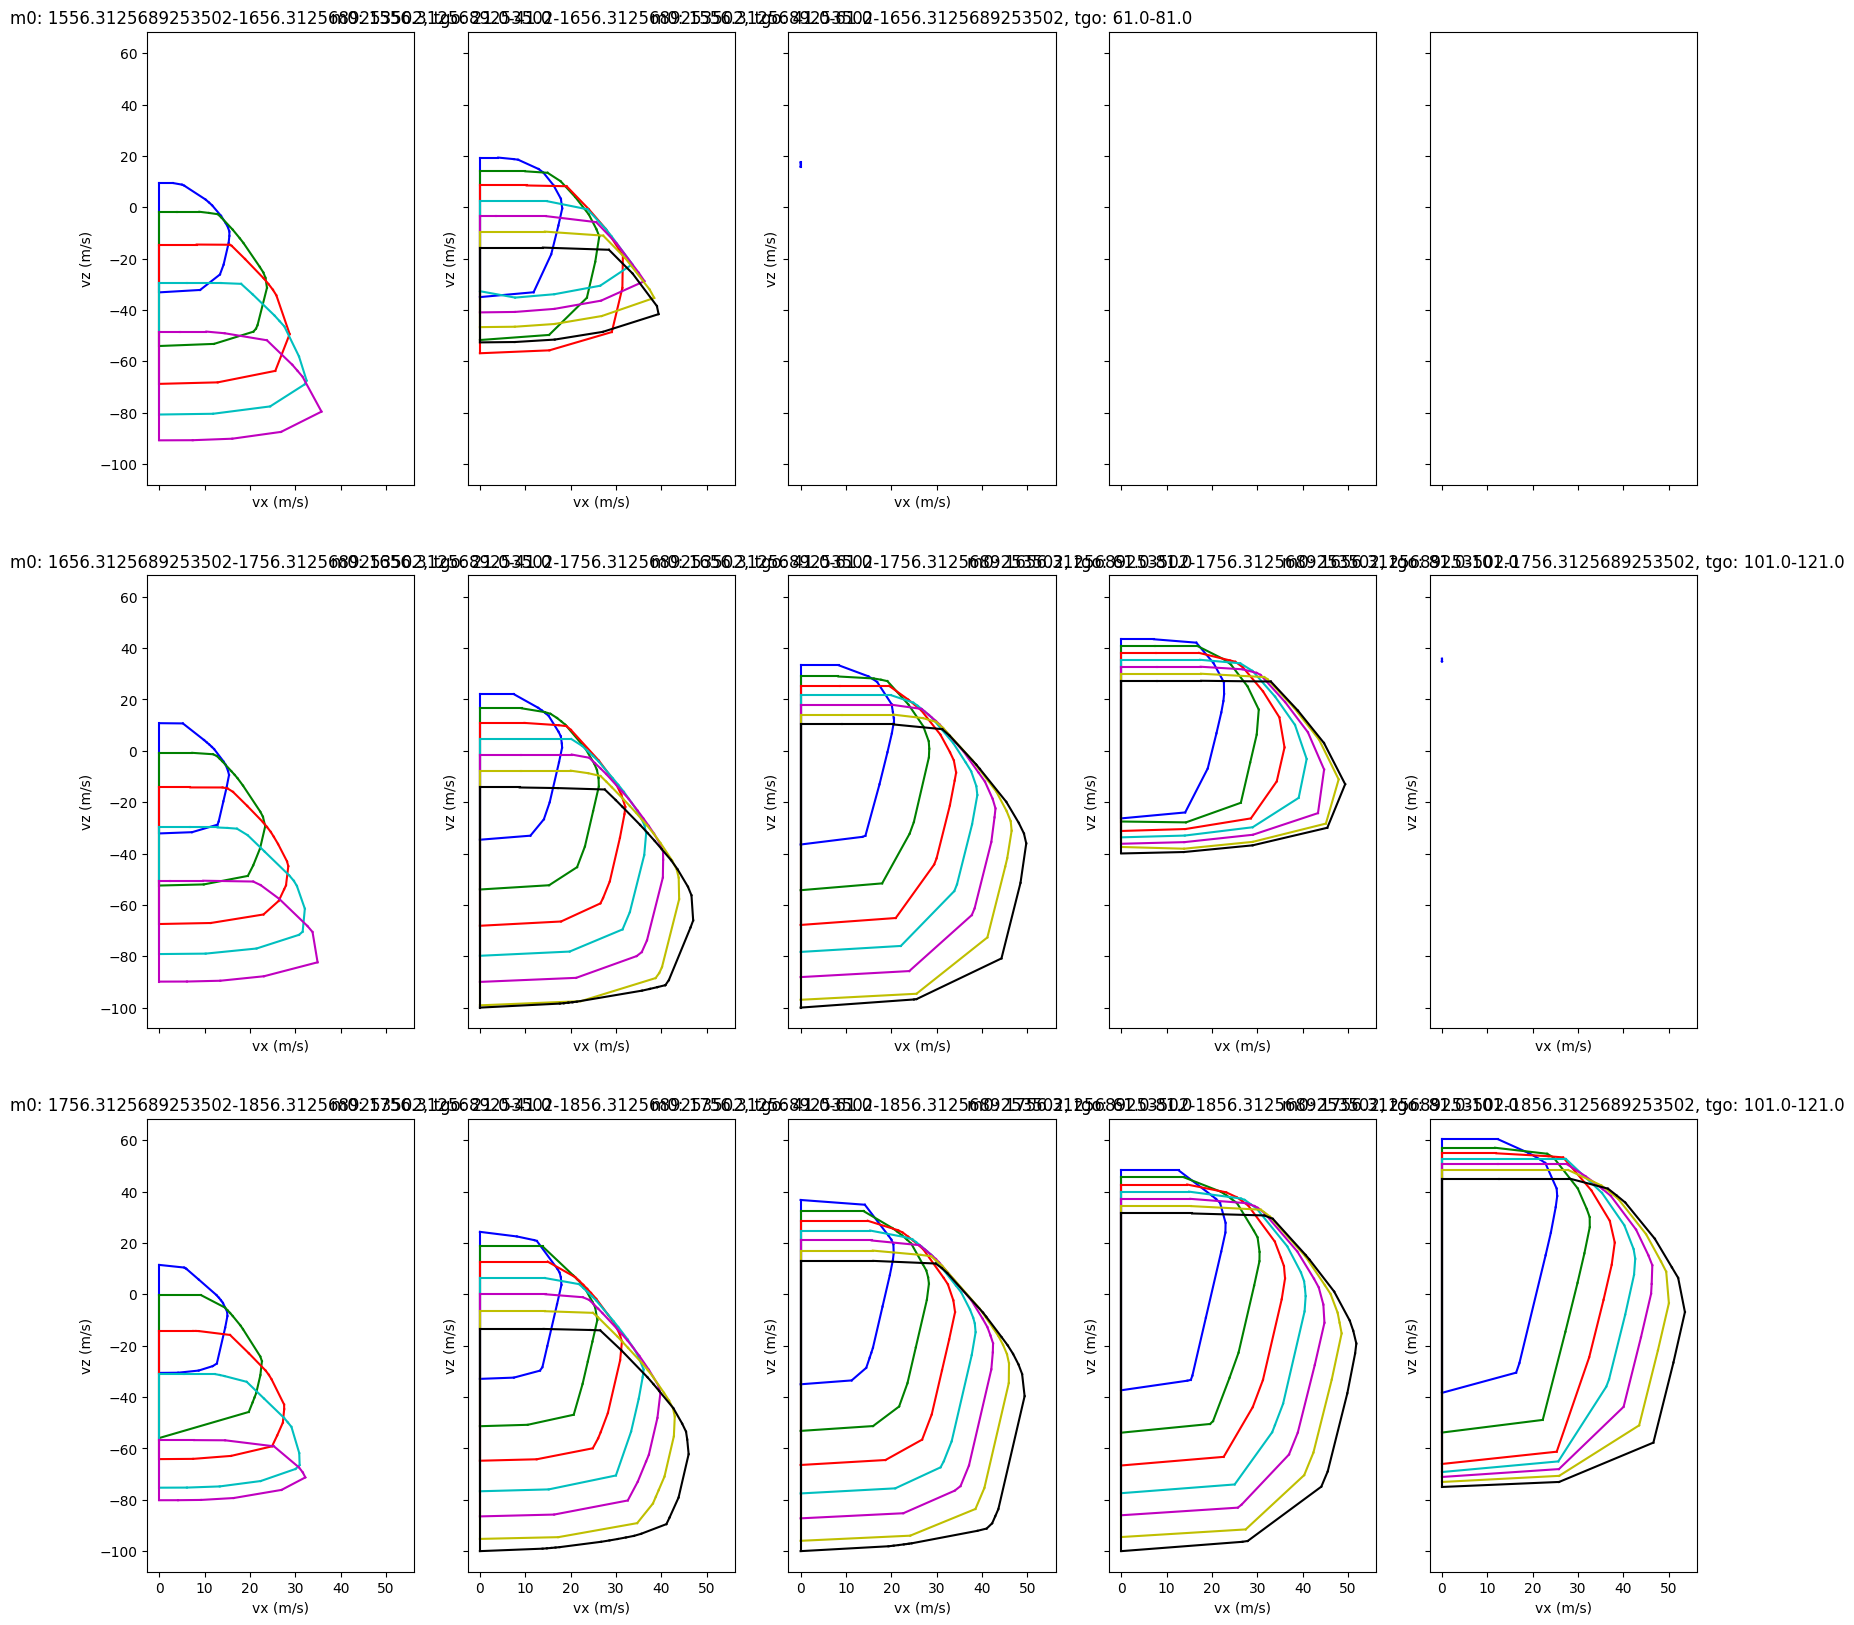

In [9]:
fig, axs = plt.subplots(n_m0, n_tgo, figsize=(20, 20), sharex=True, sharey=True)
colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k']

for i in range(n_m0):
    for j in range(n_tgo):
        group = data[(data[:, 6] >= m0_ranges[i]) & (data[:, 6] < m0_ranges[i+1]) & (data[:, 7] >= tgo_ranges[j]) & (data[:, 7] < tgo_ranges[j+1])]
        
        for k in range(n_alt):
            subgroup = group[(group[:, 2] >= alt_ranges[k]) & (group[:, 2] < alt_ranges[k+1])]
            if len(subgroup) >= 3:
                hull = ConvexHull(subgroup[:, [3, 5]])
                for s in hull.simplices:
                    axs[i, j].plot(subgroup[s, 3], subgroup[s, 5], color=colors[k % len(colors)])
                    axs[i, j].set_xlabel('vx (m/s)')
                    axs[i, j].set_ylabel('vz (m/s)')
                    axs[i, j].set_title(f'm0: {m0_ranges[i]}-{m0_ranges[i+1]}, tgo: {tgo_ranges[j]}-{tgo_ranges[j+1]}')
plt.show()

### Convex Reachable Set
Given the initial altitude, mass, and time-to-go, we numerically examine if the function mapping the initial velocity to the reachable surface is convex or not. 

Number of points: 33


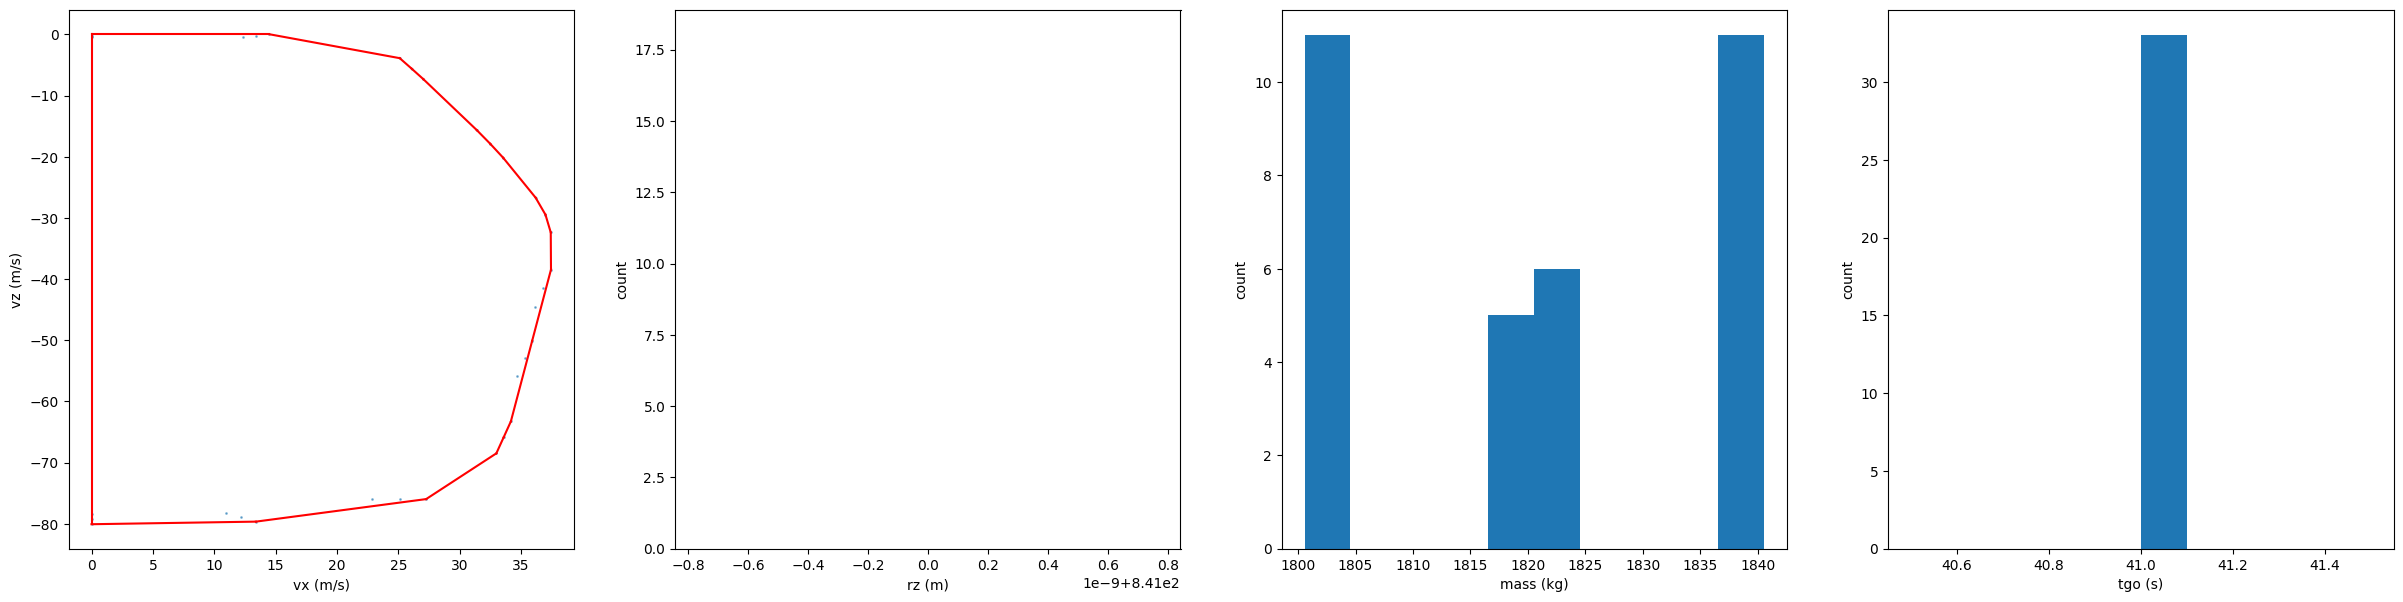

Average rz: 841.0
Average mass: 1820.5595002470563
Average tgo: 41.0


In [10]:
# Extract data for the given altitude, mass, and time-to-go
alt_range = [800.0, 850.0]
m_range = [1800.0, 1850.0]
tgo_range = [40.0, 50.0]

group = data[(data[:, 2] >= alt_range[0]) & (data[:, 2] < alt_range[1]) & (data[:, 6] >= m_range[0]) & (data[:, 6] < m_range[1]) & (data[:, 7] >= tgo_range[0]) & (data[:, 7] < tgo_range[1])]
print(f'Number of points: {len(group)}')
fig, axs = plt.subplots(1, 4, figsize=(30, 7))
axs[0].scatter(group[:, 3], group[:, 5], s=1, alpha=0.5)
if len(group) >= 3:
    hull = ConvexHull(group[:, [3, 5]])
    for s in hull.simplices:
        axs[0].plot(group[s, 3], group[s, 5], color='r')
axs[0].set_xlabel('vx (m/s)')
axs[0].set_ylabel('vz (m/s)')

# histgrams
axs[1].hist(group[:, 2])
axs[1].set_xlabel('rz (m)')
axs[1].set_ylabel('count')
axs[2].hist(group[:, 6])   
axs[2].set_xlabel('mass (kg)')
axs[2].set_ylabel('count')
axs[3].hist(group[:, 7])
axs[3].set_xlabel('tgo (s)')
axs[3].set_ylabel('count')
plt.show()

print(f'Average rz: {np.mean(group[:, 2])}')
print(f'Average mass: {np.mean(group[:, 6])}')
print(f'Average tgo: {np.mean(group[:, 7])}')

In [11]:
import cvxpy as cp
import sys
sys.path.append('..')
import src.lcvx as lc
from config.landers import get_lander

In [12]:
lander = get_lander(planet='mars')
lander.gsa = (np.pi - lander.fov) / 2  # set glide-slope angle to be FOV/2
N = 100
lcvx = lc.LCvxReachabilityVxz(rocket=lander, N=N)
prob = lcvx.problem(tf = np.mean(group[:, 7]))

In [13]:
def _solve(lcvx, prob):
    try:
        prob.solve(solver=cp.ECOS, verbose=False)
    except cp.SolverError:
        return None
    if prob.status != 'optimal':
        return None

    # Get solution
    sol = lc.get_vars(prob, ['X', 'U'])
    X_sol = sol['X']
    U_sol = sol['U']
    r, v, z, u, sigma = lcvx.recover_variables(X_sol, U_sol)
    valid, _ = lc.isolated_active_set_gs(r, lander.gsa)
    if not valid:
        return None
    return r, v, z, u, sigma

In [15]:
n = 20
n_theta = 10
theta_list = np.linspace(30, 150, 5) * np.pi / 180
alt_range = [800.0, 850.0]
m_range = [1800.0, 1850.0]
tgo_range = [40.0, 50.0]

for theta in theta_list:
    v_xz = np.zeros((n, n, 2))
    max_range_data = np.zeros((n, n))
    pbar = tqdm(total=n*n)
    for i, vx in enumerate(np.linspace(np.min(group[:, 3]), np.max(group[:, 3]), n)):
        for j, vz in enumerate(np.linspace(np.min(group[:, 5]), np.max(group[:, 5]), n)):
            v_xz[i, j] = np.array([vx, vz])
            
            # solve for center point
            lc.set_params(prob, {'alt': np.mean(group[:, 2]), 
                                'z_mass': np.mean(np.log(group[:, 6])),
                                'vx': vx,
                                'vz': vz,
                                'c': np.array([1.0, 0.0]),
                                'c_xc_arr': np.zeros((2,2))})
            sol_xmax = _solve(lcvx, prob)

            lc.set_params(prob, {'alt': np.mean(group[:, 2]), 
                                'z_mass': np.mean(np.log(group[:, 6])),
                                'vx': vx,
                                'vz': vz,
                                'c': np.array([-1.0, 0.0]),
                                'c_xc_arr': np.zeros((2,2))})
            sol_xmin = _solve(lcvx, prob)

            if sol_xmax is None or sol_xmin is None:
                max_range_data[i, j] = np.nan
                pbar.update(1)
                continue

            else:
                r_max, _, _, _, _ = sol_xmax
                r_min, _, _, _, _ = sol_xmin
                rc = (r_max[:2, -1] + r_min[:2, -1]) / 2

                c = np.array([np.cos(theta), np.sin(theta)])

                lc.set_params(prob, {'alt': np.mean(group[:, 2]), 
                                    'z_mass': np.mean(np.log(group[:, 6])),
                                    'vx': vx,
                                    'vz': vz,
                                    'c': c,
                                    'c_xc_arr': np.array([
                                        [c[0] * rc[0], c[0] * rc[1]],
                                        [c[1] * rc[0], c[1] * rc[1]]
                                    ])})
                
                sol = _solve(lcvx, prob)
                if sol is None:
                    max_range_data[i, j] = np.nan
                else:
                    r, v, z, u, sigma = sol
                    max_range_data[i, j] = np.max(c[0] * r[0, -1] + c[1] * r[1, -1])

                pbar.update(1)
    
   

    group = data[(data[:, 2] >= alt_range[0]) & (data[:, 2] < alt_range[1]) & (data[:, 6] >= m_range[0]) & (data[:, 6] < m_range[1]) & (data[:, 7] >= tgo_range[0]) & (data[:, 7] < tgo_range[1])]
    print(f'Number of points: {len(group)}')
    fig, ax = plt.subplots()
    ax.scatter(group[:, 3], group[:, 5], s=1, alpha=0.5)
    cs = ax.contourf(v_xz[:, :, 0], v_xz[:, :, 1], max_range_data, levels=10)
    #cs = ax.scatter(v_xz[:, :, 0], v_xz[:, :, 1], c=max_range_data, s=50, alpha=0.5)
    cbar = fig.colorbar(cs)
    cbar.set_label('max range (m)')
    if len(group) >= 3:
        hull = ConvexHull(group[:, [3, 5]])
        for s in hull.simplices:
            ax.plot(group[s, 3], group[s, 5], color='r')
    ax.set_xlabel('vx (m/s)')
    ax.set_ylabel('vz (m/s)')
    plt.title(f'theta: {theta * 180 / np.pi} deg')
    plt.show()


 13%|█▎        | 52/400 [01:50<12:19,  2.12s/it]


  1%|          | 4/400 [00:00<00:21, 18.03it/s]

rc: [0.00000000e+00 0.00000000e+00 2.94172639e-15]
rc: [0.00000000e+00 0.00000000e+00 8.51122645e-15]
rc: [0.00000000e+00 0.00000000e+00 1.48362648e-15]
rc: [0.00000000e+00 0.00000000e+00 2.46069553e-14]


  2%|▏         | 8/400 [00:00<00:21, 18.31it/s]

rc: [0.00000000e+00 0.00000000e+00 1.14969431e-14]
rc: [0.00000000e+00 0.00000000e+00 5.15612464e-15]
rc: [0.00000000e+00 0.00000000e+00 2.49354209e-15]
rc: [0.00000000e+00 0.00000000e+00 1.16247595e-15]
rc: [0.00000000e+00 0.00000000e+00 4.73423555e-16]


  3%|▎         | 12/400 [00:00<00:21, 18.47it/s]

rc: [0.00000000e+00 0.00000000e+00 2.63306685e-16]
rc: [0.00000000e+00 0.00000000e+00 9.37490743e-17]
rc: [ 0.00000000e+00  0.00000000e+00 -1.39809124e-16]
rc: [ 0.00000000e+00  0.00000000e+00 -4.79744287e-16]


  4%|▍         | 18/400 [00:00<00:20, 18.39it/s]

rc: [ 0.00000000e+00  0.00000000e+00 -7.88236422e-16]
rc: [ 0.00000000e+00  0.00000000e+00 -1.32345628e-15]
rc: [ 0.00000000e+00  0.00000000e+00 -2.74774593e-15]
rc: [ 0.00000000e+00  0.00000000e+00 -1.13105277e-14]


  5%|▌         | 21/400 [00:01<00:18, 20.26it/s]

rc: [ 0.00000000e+00  0.00000000e+00 -7.94195632e-16]
rc: [1.59541965e+01 0.00000000e+00 2.92996978e-15]
rc: [1.35218658e+01 0.00000000e+00 8.42019910e-15]


  7%|▋         | 27/400 [00:01<00:18, 20.56it/s]

rc: [1.19895343e+01 0.00000000e+00 1.48135559e-15]
rc: [1.08901480e+01 0.00000000e+00 2.46221883e-14]
rc: [1.00477353e+01 0.00000000e+00 1.15183458e-14]
rc: [9.42395184e+00 0.00000000e+00 5.16500931e-15]
rc: [8.94775779e+00 0.00000000e+00 2.50042445e-15]


  8%|▊         | 33/400 [00:01<00:17, 20.75it/s]

rc: [8.72282397e+00 0.00000000e+00 1.16907097e-15]
rc: [8.66227446e+00 0.00000000e+00 4.78735627e-16]
rc: [9.24855557e+00 0.00000000e+00 2.62278127e-16]
rc: [1.01483490e+01 0.00000000e+00 9.26775689e-17]
rc: [ 1.13537474e+01  0.00000000e+00 -1.40839778e-16]


  9%|▉         | 36/400 [00:01<00:17, 20.98it/s]

rc: [ 1.26295302e+01  0.00000000e+00 -4.80795259e-16]
rc: [ 1.39147750e+01  0.00000000e+00 -7.89383418e-16]
rc: [ 1.50496910e+01  0.00000000e+00 -1.31953224e-15]
rc: [ 1.58630852e+01  0.00000000e+00 -3.06267711e-15]
rc: [ 1.63798236e+01  0.00000000e+00 -1.19273099e-14]


 10%|█         | 42/400 [00:02<00:16, 21.93it/s]

rc: [ 1.66915631e+01  0.00000000e+00 -7.95648360e-16]
rc: [3.16767499e+01 0.00000000e+00 2.88880049e-15]
rc: [2.69042312e+01 0.00000000e+00 8.11116741e-15]


 11%|█▏        | 45/400 [00:02<00:16, 21.42it/s]

rc: [2.38965634e+01 0.00000000e+00 1.46812846e-15]
rc: [2.17415776e+01 0.00000000e+00 2.46750716e-14]
rc: [2.00678992e+01 0.00000000e+00 1.15737369e-14]
rc: [1.88632684e+01 0.00000000e+00 5.18891519e-15]
rc: [1.79352768e+01 0.00000000e+00 2.51942823e-15]


 13%|█▎        | 51/400 [00:02<00:16, 21.30it/s]

rc: [1.75054123e+01 0.00000000e+00 1.18706557e-15]
rc: [1.74217839e+01 0.00000000e+00 4.93347187e-16]
rc: [1.84506168e+01 0.00000000e+00 2.59125027e-16]
rc: [2.02873020e+01 0.00000000e+00 8.94105789e-17]
rc: [ 2.26704773e+01  0.00000000e+00 -1.44030547e-16]


 14%|█▍        | 57/400 [00:02<00:16, 21.33it/s]

rc: [ 2.51599368e+01  0.00000000e+00 -4.84165789e-16]
rc: [ 2.76581664e+01  0.00000000e+00 -7.93134001e-16]
rc: [ 2.98703552e+01  0.00000000e+00 -1.33015313e-15]
rc: [ 3.14742988e+01  0.00000000e+00 -3.38410565e-15]
rc: [ 3.25056612e+01  0.00000000e+00 -1.25328652e-14]


 16%|█▌        | 63/400 [00:03<00:15, 21.83it/s]

rc: [ 3.31389558e+01  0.00000000e+00 -7.99493292e-16]
rc: [4.69201271e+01 0.00000000e+00 2.82677214e-15]
rc: [3.99979511e+01 0.00000000e+00 7.67110083e-15]


 16%|█▋        | 66/400 [00:03<00:15, 21.49it/s]

rc: [3.56289328e+01 0.00000000e+00 1.43392996e-15]
rc: [3.25067878e+01 0.00000000e+00 2.47900114e-14]
rc: [3.00969513e+01 0.00000000e+00 1.15520887e-14]
rc: [2.83087944e+01 0.00000000e+00 5.21665168e-15]
rc: [2.69802040e+01 0.00000000e+00 2.54525572e-15]
rc: [2.63776599e+01 0.00000000e+00 1.21189476e-15]


KeyboardInterrupt: 

 17%|█▋        | 68/400 [00:20<00:15, 21.49it/s]

In [ ]:
alt_range = [800.0, 850.0]
m_range = [1800.0, 1850.0]
tgo_range = [40.0, 50.0]

group = data[(data[:, 2] >= alt_range[0]) & (data[:, 2] < alt_range[1]) & (data[:, 6] >= m_range[0]) & (data[:, 6] < m_range[1]) & (data[:, 7] >= tgo_range[0]) & (data[:, 7] < tgo_range[1])]
print(f'Number of points: {len(group)}')
fig, ax = plt.subplots()
ax.scatter(group[:, 3], group[:, 5], s=1, alpha=0.5)
cs = ax.contourf(v_xz[:, :, 0], v_xz[:, :, 1], max_range_data, levels=10)
#cs = ax.scatter(v_xz[:, :, 0], v_xz[:, :, 1], c=max_range_data, s=50, alpha=0.5)
cbar = fig.colorbar(cs)
cbar.set_label('max range (m)')
if len(group) >= 3:
    hull = ConvexHull(group[:, [3, 5]])
    for s in hull.simplices:
        ax.plot(group[s, 3], group[s, 5], color='r')
ax.set_xlabel('vx (m/s)')
ax.set_ylabel('vz (m/s)')
plt.show()